In [1]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟩 Job Postings Trend for Cloud Engineers (2.16.1) - Problem
Matplotlib Advanced Customization
Problem Statement:

Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

    Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
    Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
    Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.

Hint:

Use the DataFrames plot() method to create the line plot and customize the line style, color, and marker style using the linestyle, color, and marker parameters.

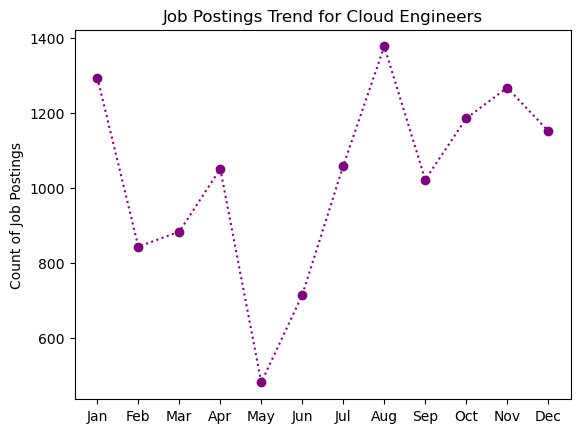

In [48]:
df_ce = df[df['job_title_short']=='Cloud Engineer'].copy()
df_ce['job_posted_date'] = pd.to_datetime(df_ce['job_posted_date'])
df_ce['job_posted_month']=df_ce['job_posted_date'].dt.month_name().str[:3]
df_ce['job_posted_month_number']=df_ce['job_posted_date'].dt.month
ce_months = df_ce.groupby(['job_posted_month_number','job_posted_month'],).size().reset_index(name='count')
ax = ce_months.plot(
    x='job_posted_month',
    y='count',
    kind='line',
    linestyle=':',
    color='purple',
    marker='o', 
    title='Job Postings Trend for Cloud Engineers',
    ylabel='Count of Job Postings',
    xlabel='',
    legend=False
)

ax.set_xticks(range(len(ce_months)))
ax.set_xticklabels(ce_months['job_posted_month'])

plt.show()

🟨 Customize Bar Chart (2.16.2) - Problem
Matplotlib Advanced Customization
Problem Statement:

Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

    Create a DataFrame called SDA_df. 
    Customize the plot by setting the bar colors to 5 different colors with the variable colors.
    Add a grid to the y-axis only and making it dashes.
    Rotate the x-axis labels by 45 degrees.
    Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Code Needed

colors = ['blue', 'orange', 'green', 'red', 'purple']

Hint:

Use DataFrame method plot() to create the bar chart specifying the color paramater. Customize the grid using the plt.grid() function specifying the parameters of axis of 'y' and linestyle of '--'.

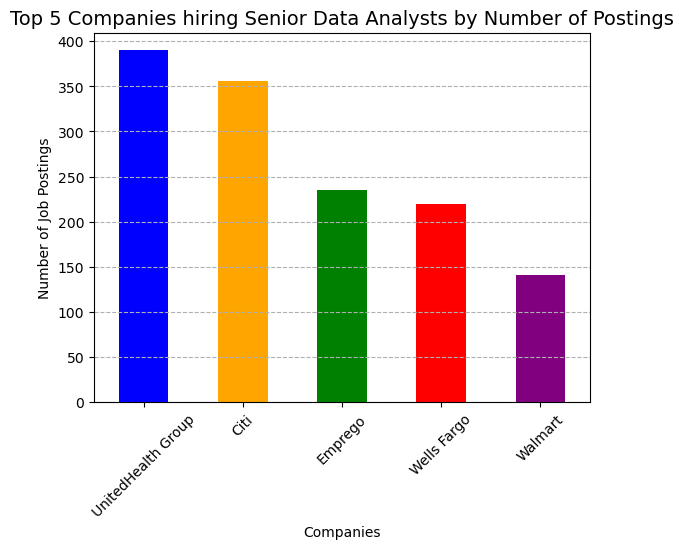

In [65]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_df=df[df['job_title_short']=='Senior Data Analyst']
top_comp = SDA_df.groupby('company_name').size().sort_values(ascending=False).head(5)
top_comp.plot(
    kind='bar',
    color= colors,
)
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=45)
plt.ylabel('Number of Job Postings')
plt.xlabel('Companies')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.show()